In [1]:
from pathlib import Path

import os 
os.environ["OMP_NUM_THREADS"] = "1" # This is done to set 
# OMP_NUM_THREADS to 1 for comparison of various k in 
# k-Means clustering.

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import pairwise
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from pandas.plotting import parallel_coordinates

%matplotlib inline
import matplotlib.pylab as plt

1. Upload, explore, clean, and preprocess data for clustering.   

a. Create a rates_df data frame by uploading the original data set into Python. Determine 
and present in this report the data frame dimensions, i.e., number of rows and columns. 
Display and present in your report the first 10 records of the rates_df data frame.

In [2]:
try:
    rates_df = pd.read_csv('Crime.csv')
except:
    print('Crime.csv is not in the present working directory')

In [3]:
print(f"The dimensions of the rates_df is {rates_df.shape}.", f"{rates_df.shape[0]} rows and {rates_df.shape[1]} columns.")

The dimensions of the rates_df is (50, 8). 50 rows and 8 columns.


In [4]:
rates_df.head(10)

,States,murder,rape,robbery,assault,burglary,larceny,auto
0,ALABAMA,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,ALASKA,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,ARIZONA,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,ARKANSAS,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,CALIFORNIA,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5
5,COLORADO,6.3,42.0,170.7,292.9,1935.2,3903.2,477.1
6,CONNECTICUT,4.2,16.8,129.5,131.8,1346.0,2620.7,593.2
7,DELAWARE,6.0,24.9,157.0,194.2,1682.6,3678.4,467.0
8,FLORIDA,10.2,39.6,187.9,449.1,1859.9,3840.5,351.4
9,GEORGIA,11.7,31.1,140.5,256.5,1351.1,2170.2,297.9


b. Use Pandas to normalize the crime data (rates_df_norm), display the first 10 records of 
the normalized data and present the table in your report. Briefly explain how the 
normalized data was calculated and what it means. Why is the normalized data used in 
clustering instead of the original data? Briefly explain.

ans: through z scores, use to mitigate large values, speeds up clustering

In [5]:
rates_df.set_index('States', inplace=True)

In [6]:
# Pandas uses sample standard deviation; will apply in cluster analysis. 
rates_df_norm = (rates_df - rates_df.mean())/rates_df.std()
rates_df_norm_round = np.round((rates_df - rates_df.mean())/rates_df.std(), 
                          decimals=2)

# Display records of utilities_df data frame.
print('Normalized Input Variables for Five Utilities')
rates_df_norm.head(10)

Normalized Input Variables for Five Utilities


,murder,rape,robbery,assault,burglary,larceny,auto
States,,,,,,,
ALABAMA,1.747195,-0.049630,-0.308913,0.668309,-0.361665,-1.087448,-0.500666
ALASKA,0.867908,2.403986,-0.308913,0.725165,0.092023,0.962259,1.943045
ARIZONA,0.531710,0.786830,0.159686,1.007451,2.437697,2.474295,0.320454
ARKANSAS,0.350680,0.173426,-0.462848,-0.078801,-0.738351,-1.114724,-1.003783
CALIFORNIA,1.048938,2.199518,1.843924,1.463297,1.959729,1.141345,1.478709
COLORADO,-0.295854,1.511762,0.527547,0.813940,1.487542,1.697062,0.514875
CONNECTICUT,-0.838943,-0.830326,0.061212,-0.792993,0.125090,-0.069689,1.115203
DELAWARE,-0.373438,-0.077512,0.372479,-0.170568,0.903436,1.387381,0.462650
FLORIDA,0.712740,1.288706,0.722230,2.371998,1.313420,1.610687,-0.135092


2. Apply hierarchical clustering to classify the states into clusters based on the normalized crime data.   

a. Develop the hierarchical clustering (hi_complete) based on the complete (maximum) 
linkage method (method=’complete’). Create and display the hierarchical dendrogram 
with the cluster threshold of 5.0 (color_threshold=5.0). Provide the dendrogram in your 
report and explain how many clusters are shown on the dendrogram. Develop and 
present in your report the cluster membership based on the number of clusters you 
received in the dendrogram. 

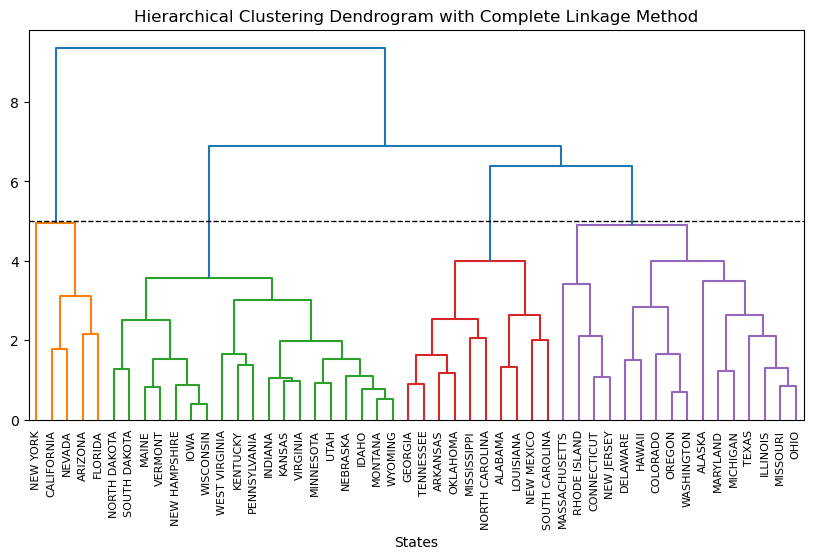

In [7]:
# Develop hierarchical (agglomerative) clustering using complete 
# linkage for clustering. 
hi_complete = linkage(rates_df_norm, method='complete')

# Develop plot parameters, title and labels. 
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram with Complete Linkage Method')
plt.xlabel('States')
 
dendrogram(hi_complete, labels=rates_df_norm.index, color_threshold=5.0)
# Develop the horizontal line representing the cluster development
# threshold (5.0) and plot the dendrogram.
plt.axhline(y=5.0, color='black', linewidth=1.0, linestyle='dashed')
plt.show()

In [8]:
# Develop and present in your report the cluster membership based on the number of clusters you received in the dendrogram. 
memb_ave = fcluster(hi_complete, 4, criterion='maxclust')
memb_ave = pd.Series(memb_ave, index=rates_df_norm.index)

# Display cluster memberships for 4 clusters.  
print('Cluster Membership for 4 Clusters Using Average Linkage Method')
for key, item in memb_ave.groupby(memb_ave):
    print(key, ' : ',' , '.join(item.index))

Cluster Membership for 4 Clusters Using Average Linkage Method
1  :  ARIZONA , CALIFORNIA , FLORIDA , NEVADA , NEW YORK
2  :  IDAHO , INDIANA , IOWA , KANSAS , KENTUCKY , MAINE , MINNESOTA , MONTANA , NEBRASKA , NEW HAMPSHIRE , NORTH DAKOTA , PENNSYLVANIA , SOUTH DAKOTA , UTAH , VERMONT , VIRGINIA , WEST VIRGINIA , WISCONSIN , WYOMING
3  :  ALABAMA , ARKANSAS , GEORGIA , LOUISIANA , MISSISSIPPI , NEW MEXICO , NORTH CAROLINA , OKLAHOMA , SOUTH CAROLINA , TENNESSEE
4  :  ALASKA , COLORADO , CONNECTICUT , DELAWARE , HAWAII , ILLINOIS , MARYLAND , MASSACHUSETTS , MICHIGAN , MISSOURI , NEW JERSEY , OHIO , OREGON , RHODE ISLAND , TEXAS , WASHINGTON


b. Identify a data frame with the normalized mean values for each cluster and input variable. 
Display these data frame and provide it in your report.  In addition, present in your report 
the profile plots of the normalized means of the clusters for the input variables. Briefly 
explain how the clusters can be characterized by their respective means.  

In [9]:
# Create data frame with normalized cluster means for each 
# cluster and each input variable (measurement). 
clust_mean_norm = rates_df_norm.groupby(memb_ave).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to the 
# cluster_mean_norm data frame with means and get precision 
# of 3 decimals.
clust_mean_norm['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean_norm.index]

# Use display.precision to reduce the number of decimals to 3. 
pd.set_option('display.precision', 3)

# Display the data frame with normalized mean values and cluster titles.
print('Normalized Means of Input Variables for Clusters with Complete Linkage Method')
clust_mean_norm

Normalized Means of Input Variables for Clusters with Complete Linkage Method


,murder,rape,robbery,assault,burglary,larceny,auto,Cluster
1,1.059,1.357,1.785,1.470,1.881,1.500,0.902,Cluster 1
2,-0.753,-0.801,-0.734,-0.852,-0.828,-0.479,-0.623,Cluster 2
3,1.036,0.233,-0.244,0.704,-0.149,-0.785,-0.617,Cluster 3
4,-0.084,0.382,0.467,0.113,0.489,0.590,0.844,Cluster 4


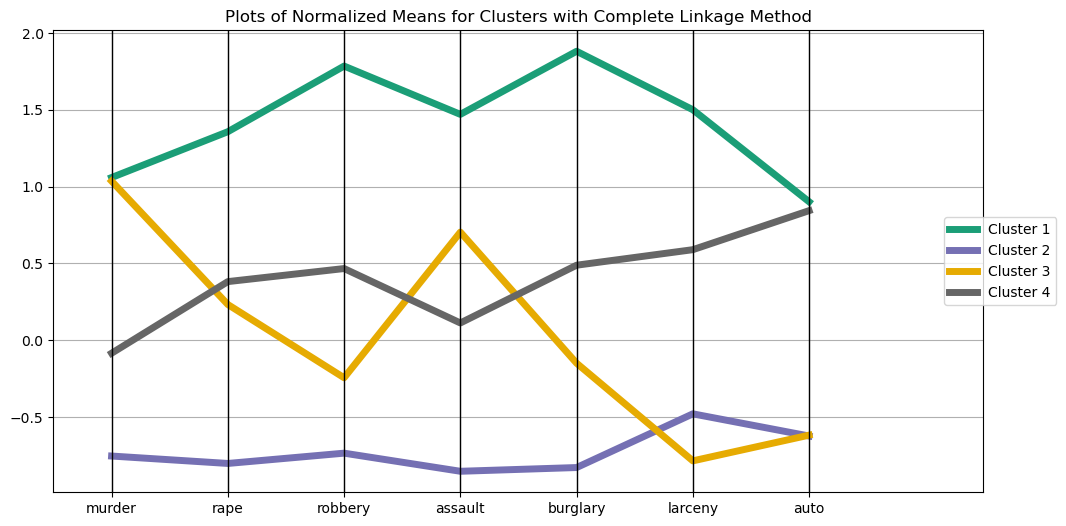

In [10]:
plt.figure(figsize=(12,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(clust_mean_norm, class_column='Cluster', 
                          colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
plt.title('Plots of Normalized Means for Clusters with Complete Linkage Method')
plt.show()

c. Based on the clusters’ profile plots and normalized mean values, provide cluster labeling 
using some common feature(s) or variable(s) means of clusters.  

Cluster 1 represents the following states: ARIZONA , CALIFORNIA , FLORIDA , NEVADA and NEW YORK which exibit the highest crime for robbery and burglary but lowest for murder and auto incidents. 

Cluster 2 represents the following states: IDAHO , INDIANA , IOWA , KANSAS , KENTUCKY , MAINE , MINNESOTA , MONTANA , NEBRASKA , NEW HAMPSHIRE , NORTH DAKOTA , PENNSYLVANIA , SOUTH DAKOTA , UTAH , VERMONT , VIRGINIA , WEST VIRGINIA , WISCONSIN and WYOMING which exibit high larceny but low rates of violent crime. 

Cluster 3 represents the following states: ALABAMA , ARKANSAS , GEORGIA , LOUISIANA , MISSISSIPPI , NEW MEXICO , NORTH CAROLINA , OKLAHOMA , SOUTH CAROLINA and TENNESSEE which exibit high rates of violent crime but low rates of non-violent crime.

Cluster 4 represents the following states: ALASKA , COLORADO , CONNECTICUT , DELAWARE , HAWAII , ILLINOIS , MARYLAND , MASSACHUSETTS , MICHIGAN , MISSOURI , NEW JERSEY , OHIO , OREGON , RHODE ISLAND , TEXAS and WASHINGTON which exibit lower non-violent crime but higher thieft and auto crime. 

3. Apply k-means clustering to classify the states into clusters based on the crime data. 

a. Create k-means clustering with k = 5. Identify cluster membership for k-means clusters 
and provide them in your report. What are the two main differences between the 
algorithms used in hierarchical and k-means clustering?  

In [12]:
# Use KMeans() function to create k-means clusters with k=5 (n_clusters=5). 
kmeans_5 = KMeans(n_clusters=5, random_state=0, n_init=1).fit(rates_df_norm)

# Develop cluster membership for k-means clusters, k=6.
memb_km5 = pd.Series(kmeans_5.labels_, index=rates_df_norm.index)

# Display cluster memberships for 5 clusters.  
print('Cluster Membership for 5 Clusters Using k-Means Clustering')
print()
for key, item in memb_km5.groupby(memb_km5):
    print(key, ': ', ', '.join(item.index))

Cluster Membership for 5 Clusters Using k-Means Clustering

0 :  CALIFORNIA, NEVADA, NEW YORK
1 :  ALASKA, ARIZONA, COLORADO, FLORIDA, MARYLAND, MICHIGAN, NEW MEXICO, OREGON, SOUTH CAROLINA, TEXAS, WASHINGTON
2 :  IDAHO, IOWA, MAINE, MINNESOTA, MONTANA, NEBRASKA, NEW HAMPSHIRE, NORTH DAKOTA, PENNSYLVANIA, SOUTH DAKOTA, UTAH, VERMONT, WEST VIRGINIA, WISCONSIN, WYOMING
3 :  ALABAMA, ARKANSAS, GEORGIA, INDIANA, KANSAS, KENTUCKY, LOUISIANA, MISSISSIPPI, MISSOURI, NORTH CAROLINA, OKLAHOMA, TENNESSEE, VIRGINIA
4 :  CONNECTICUT, DELAWARE, HAWAII, ILLINOIS, MASSACHUSETTS, NEW JERSEY, OHIO, RHODE ISLAND


b. Develop the Elbow chart for k-means clustering (k varies from 1 to 12) of the normalized 
crime data, present the chart in your report, and explain if k = 5 is an appropriate number 
of clusters in k-means clustering of the crime data.  

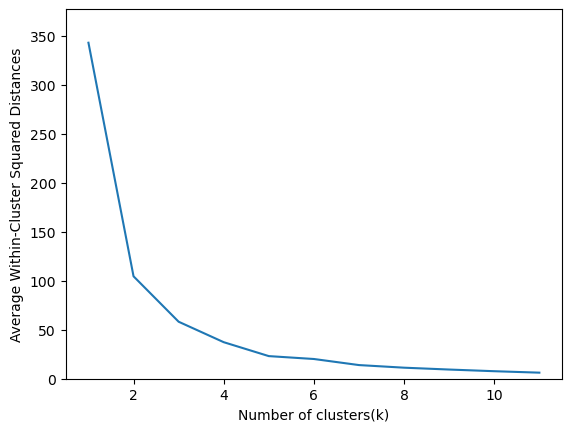

In [13]:
# Develop Elbow chart to identify appropriate k in k-Means
# clustering.

# Identify average with-cluster squred distances for k-Means 
# clusters, number of clusters k varies from 1 to 12. 
inertia = []
for n_clusters in range(1, 12):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=1).fit(rates_df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 12), 'inertia': inertia})

# Develop and display Elbow chart to compare average within-cluster 
# squared distances using k-Means clusters with number of clusters k 
# from 1 to 12. 
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()
# 5 is appropriate but 7 is worth trying out but this might make it harder to explain each cluster

c. Identify a data frame with the normalized cluster centroids for each cluster and input 
variable. Display these data frame and provide it in your report. In addition, present in 
your report the profile plots of the normalized clusters’ centroids. Briefly explain how the 
clusters can be characterized by their respective centroids.  

In [14]:
# Create data frame with normalized cluster centroids for each 
# cluster and each input variable (measurement). 
centroids = pd.DataFrame(kmeans_5.cluster_centers_, 
                    columns=rates_df_norm.columns)

# Add cluster titles (Cluster 1, Cluster 2, ...) to the 
# cluster_mean_norm data frame with means and get precision 
# of 3 decimals.
centroids['Cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
pd.set_option('display.precision', 3)

print('Cluster Centroids for k-Means Clustering with k = 5')
centroids

Cluster Centroids for k-Means Clustering with k = 5


,murder,rape,robbery,assault,burglary,larceny,auto,Cluster
0,1.351,1.571,2.680,1.324,1.884,1.139,1.441,Cluster 0
1,0.362,1.212,0.392,1.085,0.854,0.973,0.232,Cluster 1
2,-1.011,-0.941,-0.855,-0.932,-0.902,-0.490,-0.646,Cluster 2
3,0.790,-0.036,-0.189,0.076,-0.359,-0.765,-0.540,Cluster 3
4,-0.393,-0.433,0.367,-0.365,0.394,0.397,1.229,Cluster 4


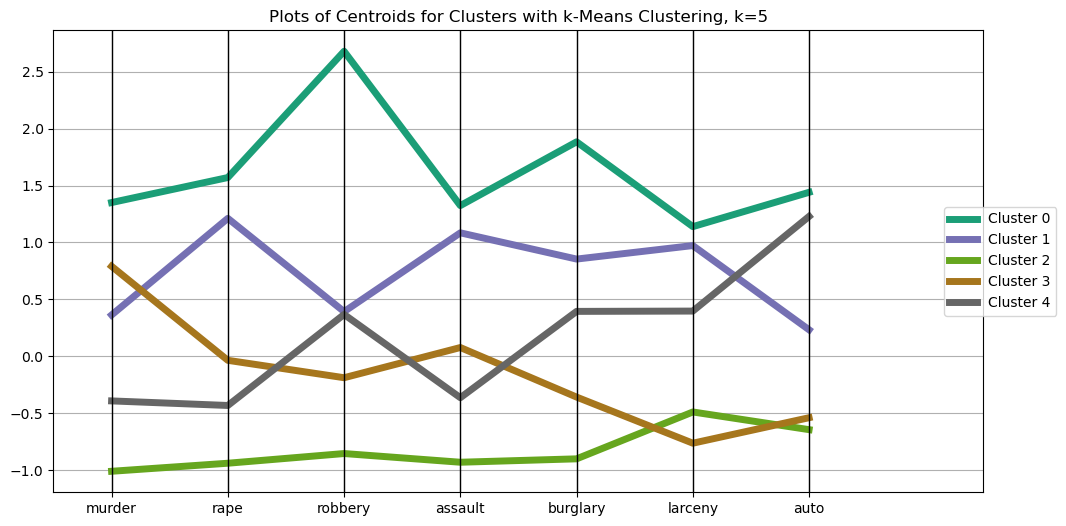

In [15]:
# Display profile plots for normalized means for each cluster and
# each input variable (measurement).
plt.figure(figsize=(12,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='Cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,7.5)
plt.title('Plots of Centroids for Clusters with k-Means Clustering, k=5')
plt.show()

d. Based on the k-means clusters’ profile plots and normalized centroids, provide cluster 
labeling using some common feature(s) or variable(s) means of clusters.     

Cluster 0 represents the following states: CALIFORNIA, NEVADA and NEW YORK which experience the highest rates of robbery and burglary but low rates of violent crime.

Cluster 1 represents the following states: ALASKA, ARIZONA, COLORADO, FLORIDA, MARYLAND, MICHIGAN, NEW MEXICO, OREGON, SOUTH CAROLINA, TEXAS and WASHINGTON which experience high rates of some violent crimes but lower rates of some non-violent crimes.

Cluster 2 represents the following states: IDAHO, IOWA, MAINE, MINNESOTA, MONTANA, NEBRASKA, NEW HAMPSHIRE, NORTH DAKOTA, PENNSYLVANIA, SOUTH DAKOTA, UTAH, VERMONT, WEST VIRGINIA, WISCONSIN and WYOMING which experience higher rates of non-violent crimes than violent crime. 

Cluster 3 represents the following states: ALABAMA, ARKANSAS, GEORGIA, INDIANA, KANSAS, KENTUCKY, LOUISIANA, MISSISSIPPI, MISSOURI, NORTH CAROLINA, OKLAHOMA, TENNESSEE and VIRGINIA which experience high rates of violent crime and low rates of non-violent.

Cluster 4 represents the following states: CONNECTICUT, DELAWARE, HAWAII, ILLINOIS, MASSACHUSETTS, NEW JERSEY, OHIO and RHODE ISLAND which experience high rates of non-violent crime compared to violent crime. 

4. Compare the clusters from parts 2 and 3. From your standpoint, which clustering, hierarchical or k-means, provides more useful insights of the states’ crime rates.